In [1]:
import re
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np

C:\Users\Akhilesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os. getcwd()

'C:\\Users\\Akhilesh\\Desktop\\Final_project\\Final_documents\\Final_documents\\sale_distance_score\\Original_datasets'

In [3]:
df_bank = pd.read_excel("Bank_final_sale.xlsx")
df_bus = pd.read_excel("Bus_stop_final_sale.xlsx")
df_cafe = pd.read_excel("Cafe_pub_final_sale.xlsx")
df_col = pd.read_excel("College_university_final_sale.xlsx")
df_Fire = pd.read_excel("fire_station_final_sale.xlsx")
df_garda = pd.read_excel("garda_final_sale.xlsx")
df_gp = pd.read_excel("gp_final_sale.xlsx")
df_gym = pd.read_excel("Gym_yoga_final_sale.xlsx")
df_hosp = pd.read_excel("Hospital_final_sale.xlsx")
df_hotel = pd.read_excel("hotel_restaurant_final_sale.xlsx")
df_Lib = pd.read_excel("library_final_sale.xlsx")
df_pharm = pd.read_excel("pharmacy_final_sale.xlsx")
df_post = pd.read_excel("post_office_final_sale.xlsx")
df_primary = pd.read_excel("Primary_secondary_school_final_sale.xlsx")
df_relig = pd.read_excel("religious_final_sale.xlsx")
df_retail = pd.read_excel("Retail_final_sale.xlsx")
df_sports = pd.read_excel("sports_facility_final_sale.xlsx")
df_tram = pd.read_excel("train_tram_final_sale.xlsx")

In [6]:
frame_sale = [df_bank,df_bus,df_cafe,df_col,df_Fire,df_garda,df_gp,df_gym,df_hosp,df_hotel,df_Lib,df_pharm,df_post,df_primary,df_relig,df_retail ,df_sports ,df_tram]

In [7]:
print(len(df_bank))
print(len(df_bus))
print(len(df_cafe))
print(len(df_col))
print(len(df_Fire))
print(len(df_garda))
print(len(df_gp))
print(len(df_gym))
print(len(df_hosp))
print(len(df_hotel))
print(len(df_Lib))
print(len(df_pharm))
print(len(df_post))
print(len(df_primary))
print(len(df_relig))
print(len(df_retail))
print(len(df_sports))
print(len(df_tram))

3637
12304
8904
3536
1346
2812
3002
6112
4696
8747
1537
6961
2712
6818
1657
9318
3401
1499


In [8]:
df_sale=pd.concat(frame_sale,sort=False)

In [9]:
df_sale

,Location,Area,Area code,Price(in Euros),House_type,Beds,Bathroom,Area_code,floor_area,Entered,...,aminities_latitude,aminities_longitude,score,Company Name,Address,Zip/Postal,Code,Type,Rating,Zip/Postal Code
0,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,285000,Apartment for sale,1,1,D00,42.1,31.05.2020,...,53.346268,-6.243876,0.5,Bloomberg LP,"The Anchorage, 4th Floor, 17-19 Rogerson's Ire...",D02,DT18,Bank,NaN,NaN
1,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,285000,Apartment for sale,1,1,D00,42.1,31.05.2020,...,53.347325,-6.233068,0.5,Ireland Strategic Investment Fund,"Treasury Dock, N Wall Quay, Dublin 1, D01 A9T8",D01,T8Y1,Bank,NaN,NaN
2,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,285000,Apartment for sale,1,1,D00,42.1,31.05.2020,...,53.347535,-6.235003,0.5,Central Bank of Ireland,"N Wall Quay, North Dock, Dublin, D01 F7X3",D01,NaN,Bank,3.9,NaN
3,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,285000,Apartment for sale,1,1,D00,42.1,31.05.2020,...,53.349035,-6.243812,0.5,AIB IFSC,"Excise Walk, Clarion Quay, North Dock, Dublin 1",D01,NaN,Bank,3.2,NaN
4,109 Parnell Street|| Dublin 1,Dublin 1,D01,220000,Apartment for sale,1,1,D01,35.0,10.05.2020,...,53.347907,-6.259035,0.5,Ulster Bank (O'Connell Street),"2-4 O'Connell Street Lower, North City, Dublin...",D01,XH68,Bank,2.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,105 Alderwood Avenue.|| D24C990|| Tallaght|| D...,Dublin 24,D24,229000,Terraced House,3,1,D24,85.0,31.05.2020,...,53.293293,-6.384085,1.0,Cookstown,"Cookstown, Dublin",D24,NaN,Train and tram station,4.6,NaN
1495,9 Drumcairn Avenue|| Tallaght|| Dublin 24,Dublin 24,D24,199000,Terraced House,3,1,D24,89.7,29.05.2020,...,53.291036,-6.406877,1.0,Cheeverstown Luas Stop,"Tallaght, Dublin",D24,NaN,Train and tram station,4.7,NaN
1496,9 Drumcairn Avenue|| Tallaght|| Dublin 24,Dublin 24,D24,199000,Terraced House,3,1,D24,89.7,29.05.2020,...,53.293565,-6.395579,1.0,Fettercairn Luas Stop,"Tallaght, Dublin",D24,NaN,Train and tram station,4.0,NaN
1497,9 Drumcairn Avenue|| Tallaght|| Dublin 24,Dublin 24,D24,199000,Terraced House,3,1,D24,89.7,29.05.2020,...,53.293318,-6.395875,1.0,Fettercairn,"Whitehall, Dublin",D09,NaN,Train and tram station,4.8,NaN


In [12]:
df_sale.to_excel('sale_final_ML.xlsx', index = False)

In [10]:
df_sale.drop(columns=['Price(in Euros)','House_type','Beds','Bathroom','Area_code','floor_area','Entered','Views','score','Address','Zip/Postal','Code','Rating','Zip/Postal Code'],inplace=True)

In [11]:
df_data_0 = df_sale

In [12]:
df_sale.head()

,Location,Area,Area code,wakable_distance,property_latitude,property_longitude,aminities_latitude,aminities_longitude,Company Name,Type
0,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.9,53.350082,-6.238685,53.346268,-6.243876,Bloomberg LP,Bank
1,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.7,53.350082,-6.238685,53.347325,-6.233068,Ireland Strategic Investment Fund,Bank
2,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.5,53.350082,-6.238685,53.347535,-6.235003,Central Bank of Ireland,Bank
3,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.7,53.350082,-6.238685,53.349035,-6.243812,AIB IFSC,Bank
4,109 Parnell Street|| Dublin 1,Dublin 1,D01,0.8,53.353609,-6.256895,53.347907,-6.259035,Ulster Bank (O'Connell Street),Bank


In [13]:
df_sale.shape

(88999, 10)

In [14]:
df_sale["Type"].unique()

array(['Bank', 'Bus stop', 'Café and pub', 'College and University',
       'Fire station', 'Garda', 'General practitioner',
       'Gym,Yoga & Swimming pool', 'Hospital', 'Restaurant', 'Library',
       'Pharmacy', 'Post office', 'Primary and secondary school',
       'Religious places', 'Retail store', 'Sports facility',
       'Train and tram station'], dtype=object)

In [15]:
df_sale_count = df_sale.groupby("Location").count()
df_sale_count= df_sale_count.sort_values('Type',ascending=False)
df_sale_count

,Area,Area code,wakable_distance,property_latitude,property_longitude,aminities_latitude,aminities_longitude,Company Name,Type
Location,,,,,,,,,
13 Trinity Plaza|| Tara Street|| Dublin 2,443,443,443,443,443,443,443,443,443
75 The Old Distillery|| North Anne Street|| Smithfield|| Dublin 7,383,383,383,383,383,383,383,383,383
Aston quay|| Temple Bar|| Dublin 2,373,373,373,373,373,373,373,373,373
5 Aston Court|| Bedford Row|| Dublin 2,345,345,345,345,345,345,345,345,345
53 Hyde Court|| Townsend Street|| Dublin 2,336,336,336,336,336,336,336,336,336
...,...,...,...,...,...,...,...,...,...
114 Waterville Terrace|| Blanchardstown|| Blanchardstown|| Dublin 15,1,1,1,1,1,1,1,1,1
Somali|| Carrickbrack Road|| Howth|| Dublin 13,1,1,1,1,1,1,1,1,1
7 Homeleigh|| Porterstown|| Castleknock|| Dublin 15,1,1,1,1,1,1,1,1,1


In [16]:
to_remove_list = df_sale_count[df_sale_count['Type']>100]
to_remove_list = to_remove_list.index.values
to_remove_list

array(['13 Trinity Plaza|| Tara Street|| Dublin 2',
       '75 The Old Distillery|| North Anne Street|| Smithfield|| Dublin 7',
       'Aston quay|| Temple Bar|| Dublin 2',
       '5 Aston Court|| Bedford Row|| Dublin 2',
       '53 Hyde Court|| Townsend Street|| Dublin 2',
       '3 Temple Bar|| Temple Bar|| Dublin 2',
       '16 Abbey Court|| Dublin 2',
       'Apartment 1|| Mellor Court|| Dublin 1',
       'Rovada House|| 32 Ormond Quay Lower|| Dublin 1',
       '9|| 50 - 52 Dame Street|| Dublin 2',
       '14 Abbey Court|| Irish Life|| Lower Abbey Street|| Dublin 1',
       'Apartment 21|| Quartier Bloom|| Bloom Lane|| Dublin 1',
       '28 Quartiere Bloom|| Ormond Quay Lower|| North City Centre|| Dublin 1',
       'Apt. 21|| 1 Jervis Street|| Dublin 1',
       'Apt. 1 12 South Anne Street|| Dublin 2',
       '14 Capel Street|| Dublin 1',
       '28 Quartiere Bloom|| Ormond Quay Lower|| Dublin 1',
       'Apartment 4|| Wicklow Court|| Dublin 2',
       '527 Talbot Hall|| Talbot Str

In [17]:
df_sale = df_sale[~df_sale.Location.isin(to_remove_list)]
df_sale.reset_index(drop=True, inplace= True)

In [18]:
df_sale

,Location,Area,Area code,wakable_distance,property_latitude,property_longitude,aminities_latitude,aminities_longitude,Company Name,Type
0,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.9,53.350082,-6.238685,53.346268,-6.243876,Bloomberg LP,Bank
1,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.7,53.350082,-6.238685,53.347325,-6.233068,Ireland Strategic Investment Fund,Bank
2,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.5,53.350082,-6.238685,53.347535,-6.235003,Central Bank of Ireland,Bank
3,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.7,53.350082,-6.238685,53.349035,-6.243812,AIB IFSC,Bank
4,120 Longboat Quay South|| Grand Canal Dock|| D...,Dublin 2,D02,0.6,53.344833,-6.236741,53.346268,-6.243876,Bloomberg LP,Bank
...,...,...,...,...,...,...,...,...,...,...
54757,105 Alderwood Avenue.|| D24C990|| Tallaght|| D...,Dublin 24,D24,0.8,53.287030,-6.382832,53.293293,-6.384085,Cookstown,Train and tram station
54758,9 Drumcairn Avenue|| Tallaght|| Dublin 24,Dublin 24,D24,0.8,53.288785,-6.397602,53.291036,-6.406877,Cheeverstown Luas Stop,Train and tram station
54759,9 Drumcairn Avenue|| Tallaght|| Dublin 24,Dublin 24,D24,0.8,53.288785,-6.397602,53.293565,-6.395579,Fettercairn Luas Stop,Train and tram station
54760,9 Drumcairn Avenue|| Tallaght|| Dublin 24,Dublin 24,D24,0.9,53.288785,-6.397602,53.293318,-6.395875,Fettercairn,Train and tram station


In [19]:
df_onehot = pd.get_dummies(df_sale[['Type']], prefix="", prefix_sep="")

In [20]:
df_onehot.head()

,Bank,Bus stop,Café and pub,College and University,Fire station,Garda,General practitioner,"Gym,Yoga & Swimming pool",Hospital,Library,Pharmacy,Post office,Primary and secondary school,Religious places,Restaurant,Retail store,Sports facility,Train and tram station
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df_onehot['Location'] = df_sale['Location'] 

# move neighborhood column to the first column
fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

df_onehot.head()

,Location,Bank,Bus stop,Café and pub,College and University,Fire station,Garda,General practitioner,"Gym,Yoga & Swimming pool",Hospital,Library,Pharmacy,Post office,Primary and secondary school,Religious places,Restaurant,Retail store,Sports facility,Train and tram station
0,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,120 Longboat Quay South|| Grand Canal Dock|| D...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df_onehot.shape

(54762, 19)

In [23]:
df_grouped = df_onehot.groupby('Location').sum().reset_index()
df_grouped.head()

,Location,Bank,Bus stop,Café and pub,College and University,Fire station,Garda,General practitioner,"Gym,Yoga & Swimming pool",Hospital,Library,Pharmacy,Post office,Primary and secondary school,Religious places,Restaurant,Retail store,Sports facility,Train and tram station
0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,0,1,0,0,0,0,0,1,1,0,3,1,4,0,0,1,2,0
1,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,8,14,7,3,2,2,2,9,3,1,5,5,8,0,17,6,2,1
2,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,0,4,0,0,0,1,2,0,0,1,1,1,0,1,0,2,0,0
3,1 Ballintyre Grove|| Ballinteer|| Dublin 16,0,8,1,0,0,0,1,1,1,0,2,1,3,1,0,3,1,0
4,1 Belarmine Park|| Stepaside|| Dublin 18,0,6,0,0,0,0,0,3,0,0,2,0,4,0,1,1,0,0


In [24]:
df_grouped.rename(columns={'Bus stop':'Bus_stop','Café and pub':'cafe_pub','College and University':'College_University','Fire station':'Fire_station','General practitioner':'General_practitioner','Gym,Yoga & Swimming pool':'Gym_yoga_swimming','Post office':'Post_office','Primary and secondary school':'Primary_secondary_school','Religious places':'Religious_places','Retail store':'Retail_stores','Sports facility':'sports_facility','Train and tram station':'Train_tram_station'},inplace=True)

In [25]:
cols = [col for col in df_grouped.columns if col in ['Location','Retail_stores']]
df_grouped = df_grouped[cols]
df_grouped

,Location,Retail_stores
0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1
1,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6
2,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
3,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
4,1 Belarmine Park|| Stepaside|| Dublin 18,1
...,...,...
2170,Woodview|| Main Street|| Blanchardstown|| Dubl...,3
2171,Woodville|| 52 / 54 Botanic Avenue|| Drumcondr...,5
2172,Wyckham Point|| Dundrum|| Dublin 16,3
2173,Yew|| Bailey Green Road|| Howth|| Dublin 13,1


In [81]:
df_grouped_bus = df_grouped[df_grouped['Retail_stores']>=0]

In [82]:
df_grouped_bus.reset_index(drop=True, inplace= True) 
df_grouped_bus

,Location,Retail_stores
0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1
1,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6
2,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
3,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
4,1 Belarmine Park|| Stepaside|| Dublin 18,1
...,...,...
2170,Woodview|| Main Street|| Blanchardstown|| Dubl...,3
2171,Woodville|| 52 / 54 Botanic Avenue|| Drumcondr...,5
2172,Wyckham Point|| Dundrum|| Dublin 16,3
2173,Yew|| Bailey Green Road|| Howth|| Dublin 13,1


In [28]:
df_grouped_Bus_index = df_grouped_bus.set_index(df_grouped_bus['Location'])
df_grouped_Bus_index.drop('Location', axis=1,inplace= True)
df_grouped_Bus_index

,Retail_stores
Location,
'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| Drumcondra|| Dublin 9,1
'Wilton Mews'|| Pembroke Gardens|| Ballsbridge|| Dublin 4,6
1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
1 Belarmine Park|| Stepaside|| Dublin 18,1
...,...
Woodview|| Main Street|| Blanchardstown|| Dublin 15,3
Woodville|| 52 / 54 Botanic Avenue|| Drumcondra|| Dublin 9,5
Wyckham Point|| Dundrum|| Dublin 16,3


In [45]:
# plt.figure(figsize=(25,10))
# sns.heatmap(df_grouped_retail_index, cmap='coolwarm')

In [29]:
from sklearn import preprocessing

In [30]:
df_grouped_clustering = df_grouped_bus.drop('Location', 1)

In [31]:
mm_scaler = preprocessing.MinMaxScaler()
df_grouped_clustering = mm_scaler.fit_transform(df_grouped_clustering)
mm_scaler.transform(df_grouped_clustering)

array([[0.00510204],
       [0.03061224],
       [0.01020408],
       ...,
       [0.01530612],
       [0.00510204],
       [0.01020408]])

In [32]:
df_grouped_clustering = pd.DataFrame(df_grouped_clustering)
df_grouped_clustering

,0
0,0.071429
1,0.428571
2,0.142857
3,0.214286
4,0.071429
...,...
2170,0.214286
2171,0.357143
2172,0.214286
2173,0.071429


In [33]:
from sklearn.cluster import KMeans

In [73]:
cost=[]
# set number of cluster
for k in range(2,16):
    kclusters = k
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)
    # check cluster labels generated for each row in the dataframe
    df_grouped_bus.insert(0, 'Cluster Labels%s' %k, kmeans.labels_)
    cost.append(kmeans.inertia_)

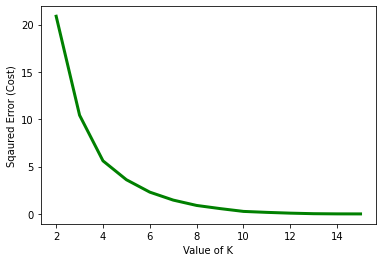

In [74]:
plt.plot(range(2, 16), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show() # clear the plot

In [83]:
# set number of clusters
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_grouped_clustering)

# check cluster labels generated for each row in the datafrlen(ame
kmeans.labels_[0:20]

array([0, 8, 3, 6, 0, 3, 1, 6, 0, 3, 2, 0, 8, 0, 6, 0, 6, 6, 8, 5])

In [84]:
# add clustering labels
df_grouped_bus.insert(0, 'Cluster Labels', kmeans.labels_)

df_merged = df_data_0

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(df_grouped_bus.set_index('Location'), on='Location')

df_merged.head() # check the last columns!


,Location,Area,Area code,wakable_distance,property_latitude,property_longitude,aminities_latitude,aminities_longitude,Company Name,Type,Cluster Labels,Retail_stores
0,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.9,53.350082,-6.238685,53.346268,-6.243876,Bloomberg LP,Bank,7.0,4.0
1,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.7,53.350082,-6.238685,53.347325,-6.233068,Ireland Strategic Investment Fund,Bank,7.0,4.0
2,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.5,53.350082,-6.238685,53.347535,-6.235003,Central Bank of Ireland,Bank,7.0,4.0
3,1 Kirkpatrick House|| Spencer House|| IFSC|| D...,Dublin 1,D01,0.7,53.350082,-6.238685,53.349035,-6.243812,AIB IFSC,Bank,7.0,4.0
4,109 Parnell Street|| Dublin 1,Dublin 1,D01,0.8,53.353609,-6.256895,53.347907,-6.259035,Ulster Bank (O'Connell Street),Bank,NaN,NaN


In [86]:
df_grouped_bus

,Cluster Labels,Location,Retail_stores
0,0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1
1,8,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6
2,3,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
3,6,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
4,0,1 Belarmine Park|| Stepaside|| Dublin 18,1
...,...,...,...
2170,6,Woodview|| Main Street|| Blanchardstown|| Dubl...,3
2171,1,Woodville|| 52 / 54 Botanic Avenue|| Drumcondr...,5
2172,6,Wyckham Point|| Dundrum|| Dublin 16,3
2173,0,Yew|| Bailey Green Road|| Howth|| Dublin 13,1


In [87]:
df_merged=df_grouped_bus

In [88]:
df_merged.dropna(inplace=True)
df_merged.reset_index(drop=True)

,Cluster Labels,Location,Retail_stores
0,0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1
1,8,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6
2,3,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
3,6,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
4,0,1 Belarmine Park|| Stepaside|| Dublin 18,1
...,...,...,...
2170,6,Woodview|| Main Street|| Blanchardstown|| Dubl...,3
2171,1,Woodville|| 52 / 54 Botanic Avenue|| Drumcondr...,5
2172,6,Wyckham Point|| Dundrum|| Dublin 16,3
2173,0,Yew|| Bailey Green Road|| Howth|| Dublin 13,1


In [89]:
df_merged.head()

,Cluster Labels,Location,Retail_stores
0,0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1
1,8,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6
2,3,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
3,6,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
4,0,1 Belarmine Park|| Stepaside|| Dublin 18,1


In [90]:
df_merged['Cluster Labels'] = df_merged['Cluster Labels'].astype(int)
df_merged.head()

,Cluster Labels,Location,Retail_stores
0,0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1
1,8,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6
2,3,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
3,6,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
4,0,1 Belarmine Park|| Stepaside|| Dublin 18,1


In [91]:
df_merged.sort_values(by='Location',inplace=True)
df_merged

,Cluster Labels,Location,Retail_stores
0,0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1
1,8,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6
2,3,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2
3,6,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3
4,0,1 Belarmine Park|| Stepaside|| Dublin 18,1
...,...,...,...
2170,6,Woodview|| Main Street|| Blanchardstown|| Dubl...,3
2171,1,Woodville|| 52 / 54 Botanic Avenue|| Drumcondr...,5
2172,6,Wyckham Point|| Dundrum|| Dublin 16,3
2173,0,Yew|| Bailey Green Road|| Howth|| Dublin 13,1


In [92]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [93]:
import folium

In [94]:
df_test=df_sale.drop_duplicates(subset='Location', keep='first', inplace=False)

In [95]:
df_test.reset_index(drop=True,inplace=True)
df_test.sort_values(by='Location',inplace=True)
df_test.drop(columns=['aminities_latitude','aminities_longitude','Company Name','Type'],inplace=True)
df_test

C:\Users\Akhilesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Akhilesh\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Location,Area,Area code,wakable_distance,property_latitude,property_longitude
1224,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,Dublin 9,D09,0.500,53.377872,-6.240996
171,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,Dublin 4,D04,0.300,53.333672,-6.238551
1569,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,Dublin 18,D18,0.200,53.228943,-6.123788
1520,1 Ballintyre Grove|| Ballinteer|| Dublin 16,Dublin 16,D16,0.400,53.273679,-6.257161
1577,1 Belarmine Park|| Stepaside|| Dublin 18,Dublin 18,D18,0.400,53.258915,-6.220460
...,...,...,...,...,...,...
723,Woodview|| Main Street|| Blanchardstown|| Dubl...,Dublin 15,D15,0.300,53.386540,-6.377356
65,Woodville|| 52 / 54 Botanic Avenue|| Drumcondr...,Dublin 9,D09,0.800,53.368185,-6.259181
641,Wyckham Point|| Dundrum|| Dublin 16,Dublin 16,D16,0.900,53.280644,-6.243707
2010,Yew|| Bailey Green Road|| Howth|| Dublin 13,Dublin 13,D13,0.093,53.371532,-6.056628


In [96]:
df_merged_tmp= pd.merge(df_merged,df_test,on='Location')

In [97]:
df_merged_tmp

,Cluster Labels,Location,Retail_stores,Area,Area code,wakable_distance,property_latitude,property_longitude
0,0,'Lyndhurst'|| 144 Grace Park Road|| D09K6P9|| ...,1,Dublin 9,D09,0.500,53.377872,-6.240996
1,8,'Wilton Mews'|| Pembroke Gardens|| Ballsbridge...,6,Dublin 4,D04,0.300,53.333672,-6.238551
2,3,1 Aubrey|| Quinns Road|| Shankill|| Dublin 18,2,Dublin 18,D18,0.200,53.228943,-6.123788
3,6,1 Ballintyre Grove|| Ballinteer|| Dublin 16,3,Dublin 16,D16,0.400,53.273679,-6.257161
4,0,1 Belarmine Park|| Stepaside|| Dublin 18,1,Dublin 18,D18,0.400,53.258915,-6.220460
...,...,...,...,...,...,...,...,...
2170,6,Woodview|| Main Street|| Blanchardstown|| Dubl...,3,Dublin 15,D15,0.300,53.386540,-6.377356
2171,1,Woodville|| 52 / 54 Botanic Avenue|| Drumcondr...,5,Dublin 9,D09,0.800,53.368185,-6.259181
2172,6,Wyckham Point|| Dundrum|| Dublin 16,3,Dublin 16,D16,0.900,53.280644,-6.243707
2173,0,Yew|| Bailey Green Road|| Howth|| Dublin 13,1,Dublin 13,D13,0.093,53.371532,-6.056628


In [98]:
# create map
map_clusters = folium.Map( zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged_tmp['property_latitude'], df_merged_tmp['property_longitude'], df_merged_tmp['Location'], df_merged_tmp['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [99]:
df_merged_tmp.to_excel("Retail_cluster_10_cluster.xlsx")